    Métrica              Valor
0  R2 Score           0.950194
1       MAE       57970.125362
2       MSE  6638233595.912257
3      RMSE       81475.355758
4      MAPE             10.16%


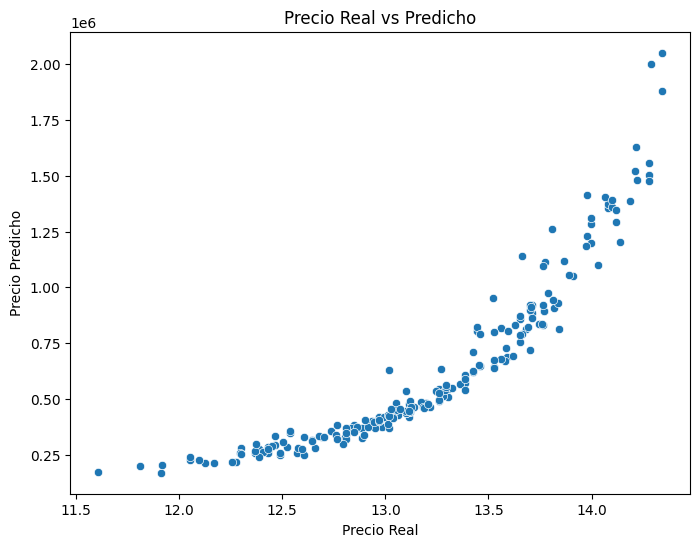

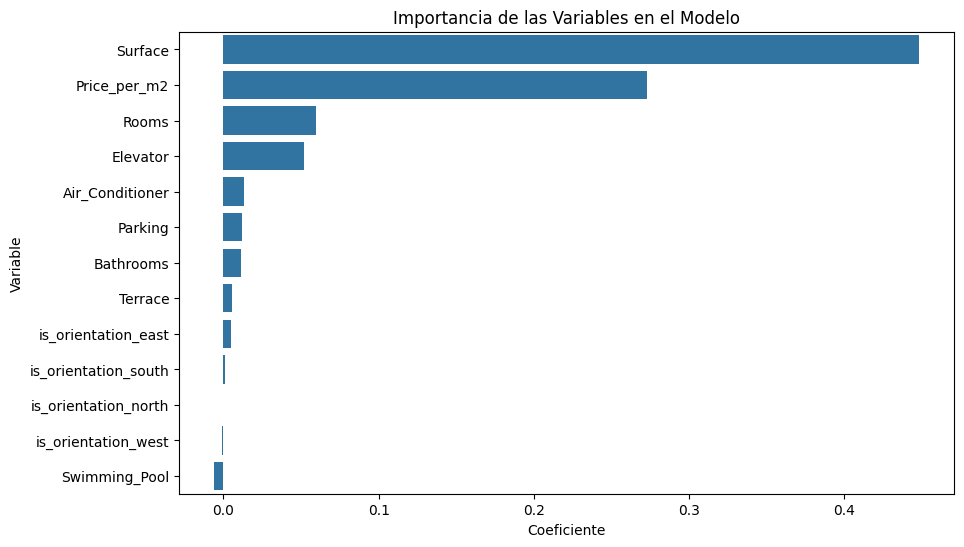

Comparación entre valores reales y predichos:
           Real       Predicho
1079   395000.0  322504.056452
279   1000000.0  906599.686200
895   1020000.0  927925.686624
554   1025000.0  812840.721623
614    650000.0  607630.985862
545    279000.0  348342.671193
315    700000.0  646449.922438
143    750000.0  643636.287545
116    255000.0  290327.398407
641    315000.0  282135.481617


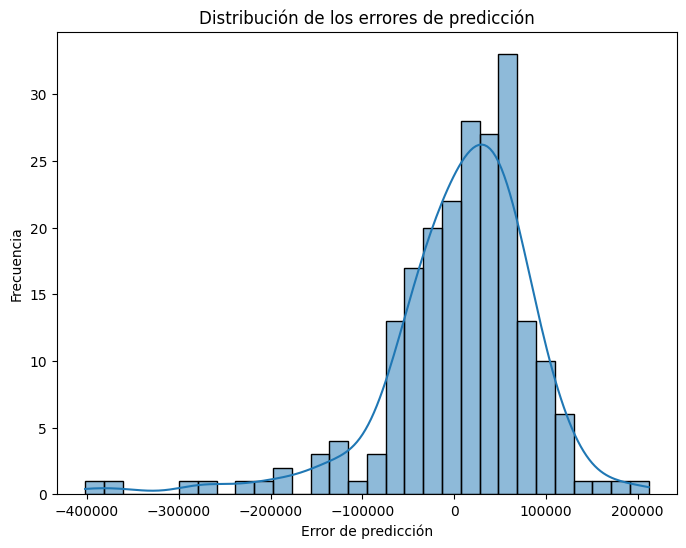

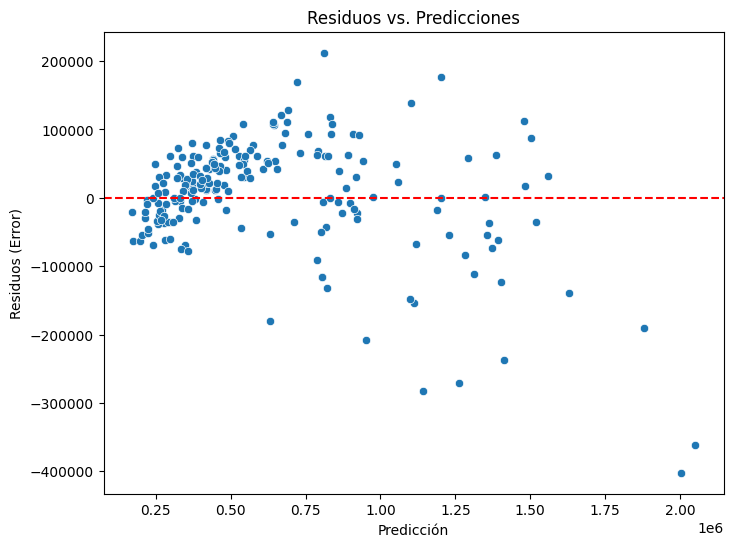

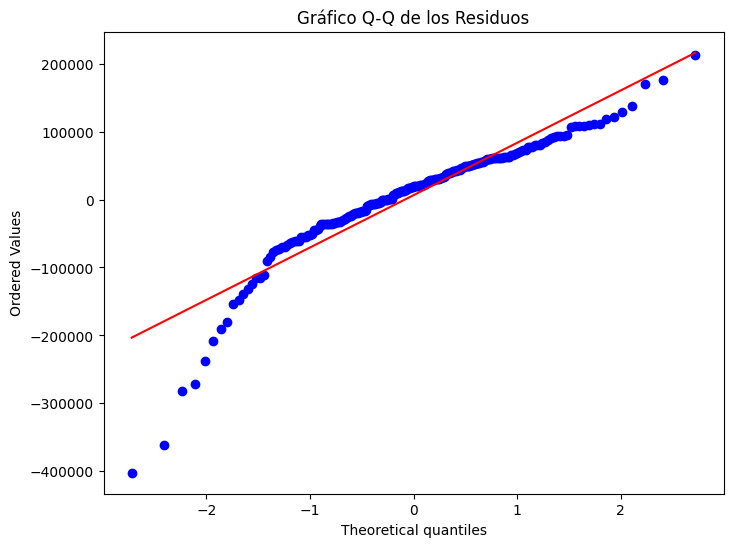

In [ ]:
#REGRESIÓN LINEAL

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.preprocessing import StandardScaler

df = pd.read_excel("merged_data.xlsx", sheet_name="Hoja1")

# Eliminar outliers
Q1 = df["Price"].quantile(0.25)
Q3 = df["Price"].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5


df = df[(df["Price"] >= (Q1 - threshold * IQR)) & (df["Price"] <= (Q3 + threshold * IQR))]

# Definir variables
variables = ["Surface", "Rooms", "Bathrooms", "Air_Conditioner", "Elevator", "Swimming_Pool",
             "Terrace", "Parking", "is_orientation_north", "is_orientation_west",
             "is_orientation_south", "is_orientation_east", "Price_per_m2"]
X = df[variables]
y = df["Price"]

# Aplicar normalización
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
X = pd.DataFrame(X_normalized, columns=variables)

# Aplicar transformación logarítmica
y_log = np.log(y)


X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=90)

modelo = LinearRegression()

# Definir MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# Validación cruzada
cv_mae = cross_val_score(modelo, X_train, y_train, cv=5, scoring="neg_mean_absolute_error")
cv_mse = cross_val_score(modelo, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
cv_rmse = np.sqrt(-cv_mse)
cv_r2 = cross_val_score(modelo, X_train, y_train, cv=5, scoring="r2")
cv_mape = cross_val_score(modelo, X_train, y_train, cv=5, scoring=mape_scorer)


# Entrenar el modelo
modelo.fit(X_train, y_train)

# Hacer predicciones y revertir transformación de escala logarítmica
y_pred_log = modelo.predict(X_test)
y_pred = np.exp(y_pred_log)
y_test_original = np.exp(y_test)

# Métricas
mae = mean_absolute_error(y_test_original, y_pred)
mse = mean_squared_error(y_test_original, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_original, y_pred)
mape = mean_absolute_percentage_error(y_test_original, y_pred)

# Crear tabla con las métricas
metricas_df = pd.DataFrame({
    "Métrica": ["R2 Score", "MAE", "MSE", "RMSE", "MAPE"],
    "Valor": [r2, mae, mse, rmse, f"{mape:.2f}%"]
})


print(metricas_df)

#Gráfico precio real vs predicho

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Precio Real vs Predicho")
plt.show()

# Gráfico importancia de las variables
coeficientes = pd.DataFrame(modelo.coef_, index=X.columns, columns=["Coeficiente"]).sort_values(by="Coeficiente", ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=coeficientes["Coeficiente"], y=coeficientes.index)
plt.xlabel("Coeficiente")
plt.ylabel("Variable")
plt.title("Importancia de las Variables en el Modelo")
plt.show()

# Comparación de valores reales y predichos
resultados_dataframe = pd.DataFrame({"Real": y_test_original, "Predicho": y_pred})
print("Comparación entre valores reales y predichos:")
print(resultados_dataframe.head(10))

# Histograma de los residuos
residuos = y_test_original - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuos, bins=30, kde=True)
plt.xlabel("Error de predicción")
plt.ylabel("Frecuencia")
plt.title("Distribución de los errores de predicción")
plt.show()

# Gráfico de residuos vs predicciones
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuos)
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Predicción")
plt.ylabel("Residuos (Error)")
plt.title("Residuos vs. Predicciones")
plt.show()

# Gráfico Q-Q de los residuos
plt.figure(figsize=(8,6))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Gráfico Q-Q de los Residuos")
plt.show()


Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Mejores parámetros: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
    Métrica               Valor
0  R2 Score            0.818687
1       MAE       107489.361941
2       MSE  24165846407.989708
3      RMSE         155453.6793
4      MAPE              17.82%


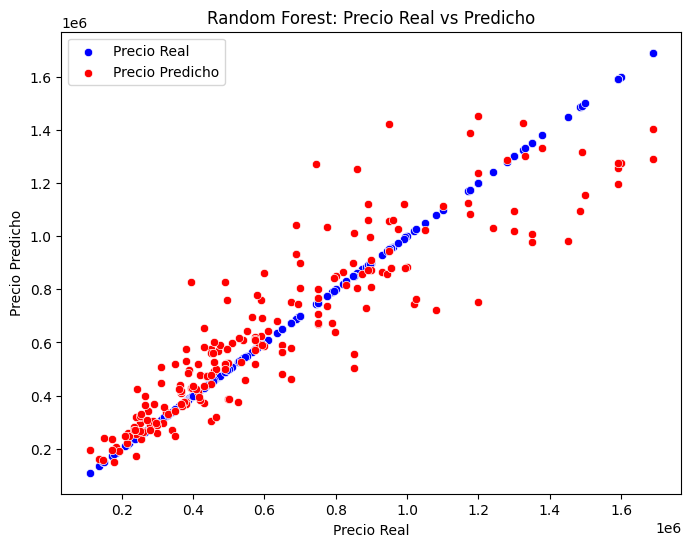

Comparación entre valores reales y predichos:
         Real       Predicho
1079   395000  828151.043416
279   1000000  883468.305483
895   1020000  743458.605256
554   1025000  764896.335006
614    650000  590153.144589
545    279000  288823.185516
315    700000  803706.827183
143    750000  670973.933983
116    255000  238202.084921
641    315000  296749.314119


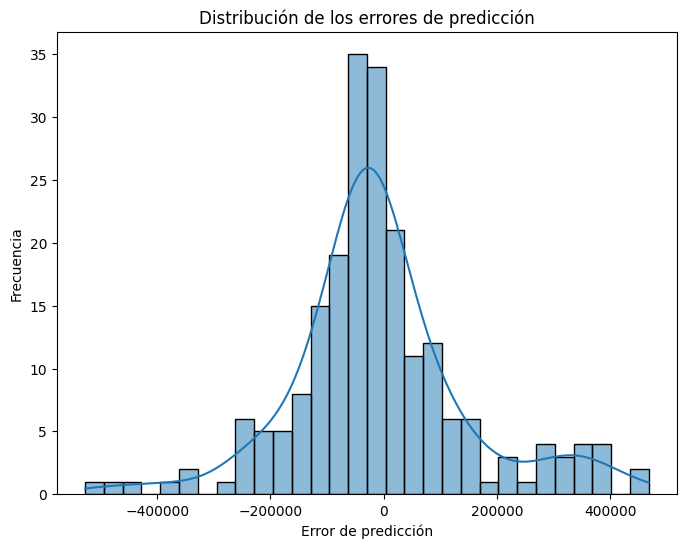

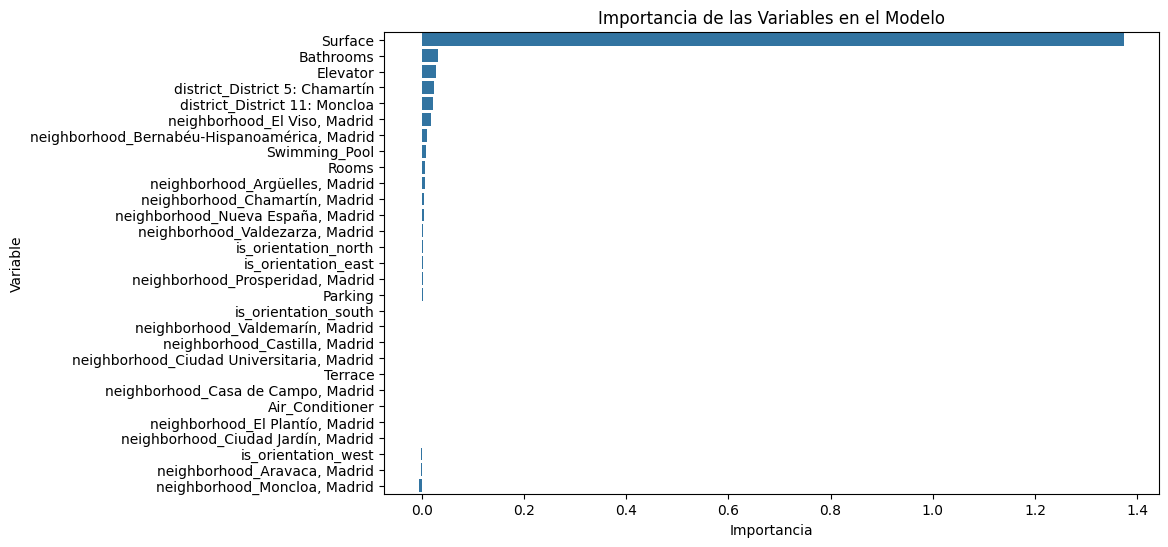

In [ ]:
#RANDOM FOREST

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.preprocessing import OneHotEncoder
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import OneHotEncoder, StandardScaler


df = pd.read_excel("merged_data.xlsx", sheet_name="Hoja1")

# Eliminar outliers
Q1 = df["Price"].quantile(0.25)
Q3 = df["Price"].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5


df = df[(df["Price"] >= (Q1 - threshold * IQR)) & (df["Price"] <= (Q3 + threshold * IQR))]


# Definir variables
variables_categoricas = ["neighborhood", "district"]
variables_numericas = ["Surface", "Rooms", "Bathrooms", "Air_Conditioner", "Elevator", "Swimming_Pool",
                       "Terrace", "Parking", "is_orientation_north", "is_orientation_west",
                       "is_orientation_south", "is_orientation_east"]

X_categorico = df[variables_categoricas]
X_numerico = df[variables_numericas]
y = df["Price"]

# Codificar variables categóricas

codificador = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
variables_codificadas = codificador.fit_transform(X_categorico)
dataframe_codificado = pd.DataFrame(variables_codificadas, columns=codificador.get_feature_names_out(variables_categoricas))

# Normalizar variables numéricas

scaler = StandardScaler()
X_numerico_normalizado = scaler.fit_transform(X_numerico)
X_numerico_normalizado = pd.DataFrame(X_numerico_normalizado, columns=variables_numericas)

# Unión variables normalizadas y codificadas

X = pd.concat([X_numerico_normalizado, dataframe_codificado], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=90)


modelo = RandomForestRegressor()

# Definir MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # MAPE en porcentaje

mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# Red de parametros con Grid Search

red_parametros = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [2, 5, 10]
}



grid_search = GridSearchCV(
    estimator=modelo,
    param_grid=red_parametros,
    cv=10,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)


grid_search.fit(X_train, y_train)


mejor_modelo = grid_search.best_estimator_
print(f"Mejores parámetros: {grid_search.best_params_}")



# Métricas
y_pred = mejor_modelo.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Tabla de Métricas
metricas_df = pd.DataFrame({
    "Métrica": ["R2 Score", "MAE", "MSE", "RMSE", "MAPE"],
    "Valor": [r2, mae, mse, rmse, f"{mape:.2f}%"]
})


print(metricas_df)


# Crear el gráfico de dispersión precio real vs precio predicho
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_test, color='blue', label="Precio Real")
sns.scatterplot(x=y_test, y=y_pred, color='red', label="Precio Predicho")
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Random Forest: Precio Real vs Predicho")
plt.legend()
plt.show()

#Comparar precios reales con predichos

resultados_dataframe = pd.DataFrame({"Real": y_test, "Predicho": y_pred})
print("Comparación entre valores reales y predichos:")
print(resultados_dataframe.head(10))

#Histogrma distribución de residuos

residuos = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuos, bins=30, kde=True)
plt.xlabel("Error de predicción")
plt.ylabel("Frecuencia")
plt.title("Distribución de los errores de predicción")
plt.show()

# Gráfico importancia de las variables

importance = permutation_importance(mejor_modelo, X_test, y_test, n_repeats=10, random_state=90)

coeficientes = pd.DataFrame({"Importancia": importance.importances_mean}, index=X.columns)
coeficientes = coeficientes.sort_values(by="Importancia", ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x=coeficientes["Importancia"], y=coeficientes.index)
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.title("Importancia de las Variables en el Modelo")
plt.show()

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mejores parámetros: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.05}
    Métrica          Valor
0  R2 Score       0.819213
1       MAE   86236.296875
2       MSE  16570757120.0
3      RMSE  128727.452861
4      MAPE         14.44%


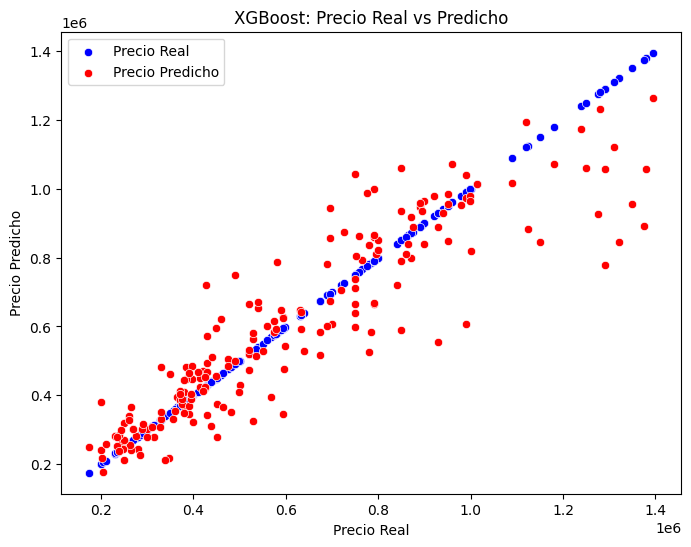

Comparación entre valores reales y predichos:
        Real      Predicho
439   796000  8.108914e+05
258   990000  6.064434e+05
51    870000  7.997758e+05
786   270000  3.017825e+05
698   374000  3.869823e+05
691   365000  3.946428e+05
566   370000  3.871924e+05
1077  850000  1.059885e+06
965   250000  2.458494e+05
937   299000  3.016724e+05


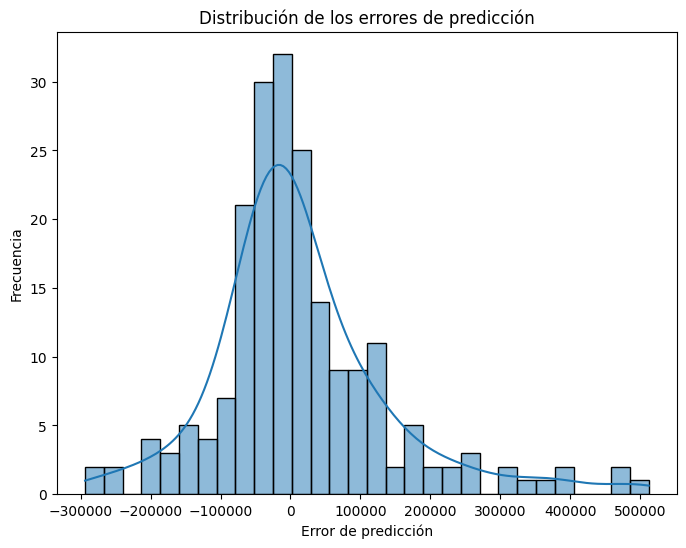

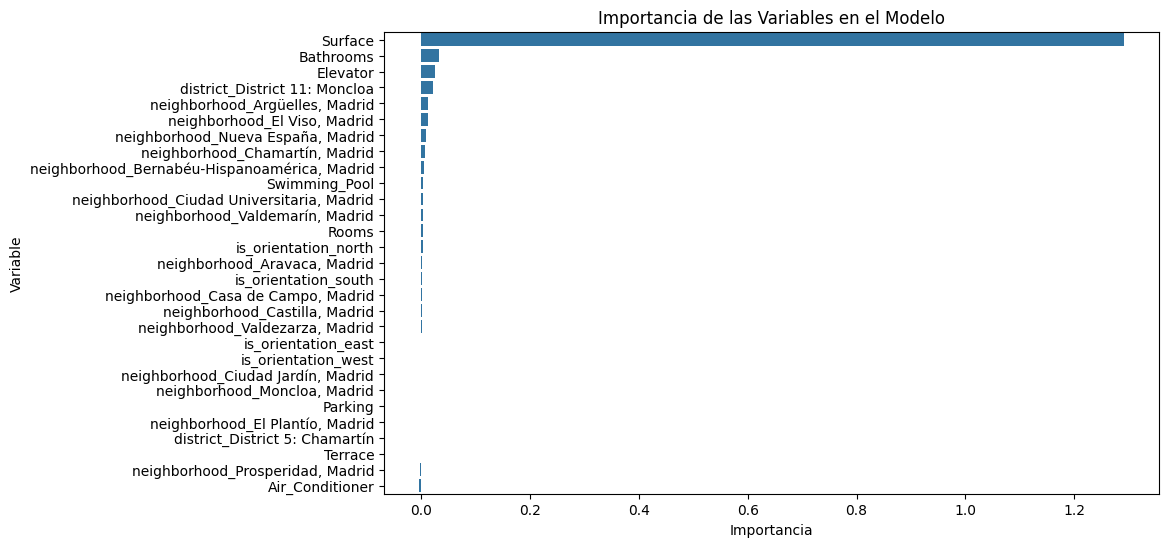

Modelo, scaler y encoder guardados correctamente.


['columnas_categoricas.pkl']

In [ ]:
#XGBOOST

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.inspection import permutation_importance
import joblib

df = pd.read_excel("merged_data.xlsx", sheet_name="Hoja1")

# Eliminar outliers

Q1 = df["Price"].quantile(0.25)
Q3 = df["Price"].quantile(0.75)
IQR = Q3 - Q1
threshold = 1


df = df[df["Price"] <= (Q3 + threshold * IQR)]

# Seleccionar variables
variables = ["neighborhood", "district", "Surface", "Rooms", "Bathrooms", "Air_Conditioner", "Elevator", "Swimming_Pool",
            "Terrace", "Parking", "is_orientation_north", "is_orientation_west",
            "is_orientation_south", "is_orientation_east"]
X = df[variables]
y = df["Price"]

# Definir MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Codificar variables categóricas

variables_categoricas = ["neighborhood", "district"]
codificador = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
variables_codificadas = codificador.fit_transform(X[variables_categoricas])
dataframe_codificado = pd.DataFrame(variables_codificadas, columns=codificador.get_feature_names_out(variables_categoricas))

# Normalizar variables numéricas
variables_numericas = ["Surface", "Rooms", "Bathrooms", "Air_Conditioner", "Elevator", "Swimming_Pool",
                      "Terrace", "Parking", "is_orientation_north", "is_orientation_west",
                      "is_orientation_south", "is_orientation_east"]

scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X[variables_numericas])
X_numerical_scaled = pd.DataFrame(X_numerical_scaled, columns=variables_numericas)

# Unir variables codificadas y normalizadas
X = pd.concat([X_numerical_scaled, dataframe_codificado], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=90)


model = XGBRegressor(objective='reg:squarederror', eval_metric="rmse", random_state=42)

# Red de parámetros con grid search
red_parametros = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9, 1.0]
}


random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=red_parametros,
    n_iter=20,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1,
    random_state=42
)


random_search.fit(X_train, y_train)

# Mejores hiperparámetros
best_params = random_search.best_params_
print(f"Mejores parámetros: {best_params}")

# Reentrenar el mejor modelo
best_model = XGBRegressor(**best_params, objective='reg:squarederror', eval_metric="rmse", random_state=42)
best_model.fit(X_train, y_train)


# Métricas
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Tabla con las métricas
metricas_df = pd.DataFrame({
    "Métrica": ["R2 Score", "MAE", "MSE", "RMSE", "MAPE"],
    "Valor": [r2, mae, mse, rmse, f"{mape:.2f}%"]
})

print(metricas_df)

# Gráfico de dispersión precio real vs precio predicho

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_test, color='blue', label="Precio Real")
sns.scatterplot(x=y_test, y=y_pred, color='red', label="Precio Predicho")
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("XGBoost: Precio Real vs Predicho")
plt.legend()
plt.show()

# Comparación entre valores reales y predichos
df_results = pd.DataFrame({"Real": y_test, "Predicho": y_pred})
print("Comparación entre valores reales y predichos:")
print(df_results.head(10))

# Histograma de distribución de los residuos
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Error de predicción")
plt.ylabel("Frecuencia")
plt.title("Distribución de los errores de predicción")
plt.show()

# Gráfico importancia de las variables
importance = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=90)

coeficientes = pd.DataFrame({"Importancia": importance.importances_mean}, index=X.columns)
coeficientes = coeficientes.sort_values(by="Importancia", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=coeficientes["Importancia"], y=coeficientes.index)
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.title("Importancia de las Variables en el Modelo")
plt.show()


# Guardar el modelo entrenado
joblib.dump(best_model, 'modelo_xgboost.pkl')

# Guardar el escalador de las variables numéricas
joblib.dump(scaler, 'scaler.pkl')

# Guardar el codificador de las variables categóricas
joblib.dump(codificador, 'encoder.pkl')

print("Modelo, scaler y encoder guardados correctamente.")

with open("requirements.txt", "w") as f:
    f.write("""streamlit
scikit-learn
pandas
xgboost
joblib""")

# Guardar las columnas con las que se entrena el escalador
with open("columnas_numericas.pkl", "wb") as f:
    joblib.dump(X_numerical_scaled.columns.tolist(), f)

# Obtener los nombres de las columnas codificadas
columnas_codificadas = codificador.get_feature_names_out(variables_categoricas)

# Guardar las columnas codificadas
joblib.dump(columnas_codificadas, "columnas_categoricas.pkl")






In [ ]:
# ValorizaAI

%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Cargar modelos
modelo = joblib.load("modelo_xgboost.pkl")
escalador = joblib.load("scaler.pkl")
codificador = joblib.load("encoder.pkl")

st.title("Predicción de precio de vivienda")
st.write("Introduce las características del inmueble para obtener una estimación del precio de venta.")

# Formulario
surface = st.number_input("Superficie (m²)", min_value=10, max_value=1000, value=80)
rooms = st.slider("Número de habitaciones", 1, 10, 3)
bathrooms = st.slider("Número de baños", 1, 5, 2)
air = st.checkbox("Aire acondicionado")
elevator = st.checkbox("Ascensor")
pool = st.checkbox("Piscina")
terrace = st.checkbox("Terraza")
parking = st.checkbox("Plaza de garaje")

orientaciones = ["Norte", "Sur", "Este", "Oeste"]
orientacion = st.selectbox("Orientación", orientaciones)

neighborhood = st.selectbox("Barrio", ["Ciudad Universitaria", "Valdemarín", "El Viso", "Nueva España", "Castilla"])
district = st.selectbox("Distrito", ["Moncloa-Aravaca", "Chamartín"])

# Codificar orientación
orient_dict = {
    "is_orientation_north": 1 if orientacion == "Norte" else 0,
    "is_orientation_south": 1 if orientacion == "Sur" else 0,
    "is_orientation_east": 1 if orientacion == "Este" else 0,
    "is_orientation_west": 1 if orientacion == "Oeste" else 0,
}

# Crear info del usuario como DataFrame
input_data = pd.DataFrame([{
    "Surface": surface,
    "Rooms": rooms,
    "Bathrooms": bathrooms,
    "Air_Conditioner": int(air),
    "Elevator": int(elevator),
    "Swimming_Pool": int(pool),
    "Terrace": int(terrace),
    "Parking": int(parking),
    **orient_dict,
    "Price_per_m2": 0
}])


# Lista de columnas en el mismo orden que se usaron al entrenar el escalador
columnas_esperadas = ['Surface', 'Rooms', 'Bathrooms', 'Air_Conditioner', 'Elevator',
                      'Swimming_Pool', 'Terrace', 'Parking', 'is_orientation_north',
                      'is_orientation_west', 'is_orientation_south', 'is_orientation_east', 'Price_per_m2']


input_data = input_data[columnas_esperadas]

# Normalizar las variables numéricas
input_scaled = escalador.transform(input_data)

# Codificar barrio y distrito
categoricas = pd.DataFrame(codificador.transform([[neighborhood, district]]), columns=codificador.get_feature_names_out())

# Unir todo
X_final = pd.concat([pd.DataFrame(input_scaled, columns=input_data.columns), categoricas], axis=1)

# Hacer predicción
prediccion = modelo.predict(X_final)[0]

# Mostrar resultado
st.subheader("Precio estimado de la vivienda:")
st.success(f"{int(prediccion):,} €".replace(",", "."))


Overwriting app.py
